# Genre Prediction - Modeling<a id='Modeling'></a>

## Contents<a id='Contents'></a>
* [Modeling](#Modeling)
  * [Contents](#Contents)
    * [Imports](#Imports)
    * [Load Data](#LoadData)
    * [Preprocessing & Training](#Training)
    * [Decision Tree Classifier](#DecisionTree)
    * [Random Forest Classifier](#RandomForest)
    * [Gradient Boosting Classifier](#GradientBoosting)
    * [Extreme Gradient Boosting (XGB) Classifier](#XGB)
    * [Conclusion](#Conclusion)

### Imports<a id='Imports'></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier, DMatrix, cv
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import sklearn.cluster
import sklearn.decomposition

### Load Data<a id='Load Data'></a>

In [2]:
df = pd.read_csv('audio_features.csv')
genres = df.genre.unique()
df.head()

track_id                      track          artist  \
0  0prNGof3XqfTvNDxHonvdK    Scars To Your Beautiful    Alessia Cara   
1  1rfofaqEpACxVEHIZBJe6W  Havana (feat. Young Thug)  Camila Cabello   
2  4l0Mvzj72xxOpRrp6h8nHi        Lose You To Love Me    Selena Gomez   
3  6T6D9CIrHkALcHPafDFA6L                      Vibez            ZAYN   
4  15og0pCEcTFWEXOFKdcJlU                    Hate Me  Ellie Goulding   

                  album release_date genre subgenre  duration_ms  popularity  \
0  Know-It-All (Deluxe)   2015-01-01   pop      pop       230226          73   
1                Camila   2018-01-01   pop      pop       217306          80   
2                  Rare   2020-01-01   pop      pop       206458          83   
3   Nobody Is Listening   2021-01-01   pop      pop       163346          73   
4        Brightest Blue   2020-01-01   pop      pop       188066          68   

   danceability  ...  speechiness  acousticness  instrumentalness  liveness  \
0         0.573  ...     0.282499        0.0285          0.000000     0.111   
1         0.765  ...     0.020387        0.1840          0.000036     0.132   
2         0.488  ...     0.056394        0.5560          0.000000     0.210   
3         0.643  ...     0.163887        0.2410          0.017800     0.120   
4         0.640  ...     0.111464        0.0875          0.000000     0.147   

   valence    tempo  mode  release_year  duration_min  duration_minsec  
0   0.4510   97.085     1          2015      3.837100        3 m, 50 s  
1   0.3940  104.988     1          2018      3.621767        3 m, 37 s  
2   0.0978  102.819     1          2020      3.440967        3 m, 26 s  
3   0.2970   96.924     1          2021      2.722433        2 m, 43 s  
4   0.7620   75.018     1          2020      3.134433         3 m, 8 s  

[5 rows x 22 columns]

### Preprocessing & Training<a id='Training'></a>

Initialize X and y

In [3]:
X = df.iloc[:,7:21]
y = df.genre

Split training and testing sets

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

Standardize the model features

In [5]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Decision Tree Classifier<a id='DecisionTree'></a>

Testing

In [6]:
entropy_model = DecisionTreeClassifier(criterion="entropy")

entropy_model.fit(X_train, y_train)

y_pred = entropy_model.predict(X_test)

Performance

In [7]:
print(classification_report(y_test,y_pred))

Accuracy:               precision    recall  f1-score   support

   classical       0.93      0.88      0.91       290
     country       0.55      0.61      0.58       310
         edm       0.71      0.73      0.72       297
     hip hop       0.69      0.66      0.68       311
       indie       0.53      0.56      0.55       301
        jazz       0.77      0.88      0.82       285
       latin       0.66      0.64      0.65       294
       metal       0.77      0.77      0.77       282
         pop       0.45      0.39      0.41       302
         r&b       0.60      0.57      0.58       306
      reggae       0.66      0.70      0.68       306
        rock       0.63      0.58      0.60       316

    accuracy                           0.66      3600
   macro avg       0.66      0.66      0.66      3600
weighted avg       0.66      0.66      0.66      3600



Summary of Results:

The Decision Tree Classifier was 66% percent accurate on average. The genres that the model learned best were Classical, Jazz, and Metal, whereas Pop was the most difficult genre to classify.

### Random Forest Classifier<a id='RandomForest'></a>

RandomizedSearch for Best Parameters

In [10]:
param_grid = {'n_estimators':np.arange(1,500)}
rf = RandomForestClassifier()
rf_cv= RandomizedSearchCV(rf,param_grid,cv=5, n_iter=50)
rf_cv.fit(X_train,y_train)

print("Best Score: " + str(rf_cv.best_score_))
print("Best Parameters: " + str(rf_cv.best_params_))

Best Score:0.7262962962962962
Best Parameters: {'n_estimators': 498}


Testing

In [16]:
rf_model = RandomForestClassifier(n_estimators=498)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

Performance

In [17]:
print(classification_report(y_test,y_pred))

Accuracy:               precision    recall  f1-score   support

   classical       0.95      0.95      0.95       290
     country       0.68      0.68      0.68       310
         edm       0.77      0.81      0.79       297
     hip hop       0.76      0.81      0.78       311
       indie       0.60      0.63      0.62       301
        jazz       0.83      0.90      0.86       285
       latin       0.77      0.72      0.74       294
       metal       0.81      0.87      0.84       282
         pop       0.58      0.50      0.54       302
         r&b       0.75      0.66      0.70       306
      reggae       0.77      0.78      0.78       306
        rock       0.71      0.69      0.70       316

    accuracy                           0.75      3600
   macro avg       0.75      0.75      0.75      3600
weighted avg       0.75      0.75      0.75      3600



<AxesSubplot:>

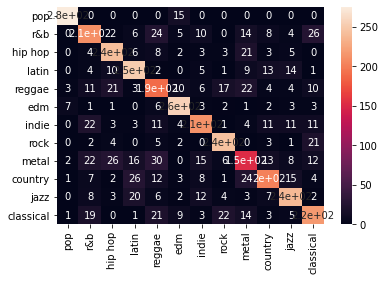

In [18]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, xticklabels=genres, yticklabels=genres)

Summary of Results:

The Random Forest Classifier outperformed the individual decision tree classifiers and were 75% percent accurate on average. A Randomized Search with cross validation for the best hyperparameters revealed that the best results come from the model with 498 estimators. This model still learned Classical, Jazz, and Metalthe best, but its performance on the remaining genres significantly improved across the board.

### Gradient Boosting Classifier<a id='GradientBoosting'></a>

RandomizedSearch for best parameters

In [20]:
param_grid = {'n_estimators':np.arange(1,500),
              'learning_rate':[0.05, 0.1, 0.25, 0.5, 0.75, 1],
              'max_depth':np.arange(2,11)}
gb = GradientBoostingClassifier()
gb_cv= RandomizedSearchCV(gb,param_grid,cv=5, n_iter=50)
gb_cv.fit(X_train, y_train)

print("Best Score: " + str(gb_cv.best_score_))
print("Best Parameters: " + str(gb_cv.best_params_))

Best Score: 0.72
Best Parameters: {'n_estimators': 455, 'max_depth': 4, 'learning_rate': 0.1}


Testing

In [21]:
gb_model = GradientBoostingClassifier(n_estimators=455, learning_rate=0.1, max_depth=4)

gb_model.fit(X_train, y_train)

y_pred = gb_model.predict(X_test)

Performance

In [22]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

   classical       0.95      0.93      0.94       290
     country       0.66      0.67      0.66       310
         edm       0.81      0.82      0.82       297
     hip hop       0.77      0.80      0.78       311
       indie       0.60      0.64      0.62       301
        jazz       0.82      0.89      0.85       285
       latin       0.75      0.71      0.73       294
       metal       0.85      0.83      0.84       282
         pop       0.54      0.51      0.53       302
         r&b       0.75      0.66      0.70       306
      reggae       0.74      0.79      0.77       306
        rock       0.71      0.68      0.69       316

    accuracy                           0.74      3600
   macro avg       0.74      0.74      0.74      3600
weighted avg       0.74      0.74      0.74      3600



<AxesSubplot:>

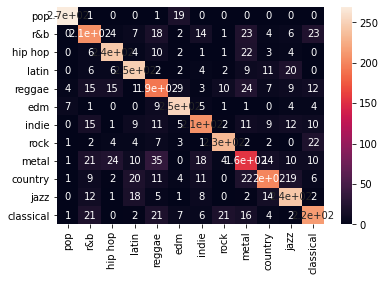

In [23]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, xticklabels=genres, yticklabels=genres)

### Extreme Gradient Boosting (XGB) Classifier<a id='XGB'></a>

GridSearch for best parameters

In [32]:
param_grid = {'n_estimators':np.arange(1,500),
              'gamma': [0.05, 0.1, 0.25, 0.5],
              'reg_lambda': [0.05, 0.1, 0.25, 0.5, 0.75, 1],
              'colsample_bytree': [0.05, 0.1, 0.25, 0.5, 0.75, 1],
              'learning_rate':[0.05, 0.1, 0.25, 0.5, 0.75, 1],
              'max_depth':np.arange(2,11)}
xgb = XGBClassifier()
xgb_cv= RandomizedSearchCV(xgb,param_grid,cv=5, n_iter=50)
xgb_cv.fit(X_train, y_train)

print("Best Score: " + str(xgb_cv.best_score_))
print("Best Parameters: " + str(xgb_cv.best_params_))

C:\Users\colel\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:43:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:43:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:44:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:45:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

[20:48:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:48:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:49:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:49:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

[20:54:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:54:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:54:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:55:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

[21:00:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:00:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:00:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:00:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

[21:06:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:06:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:06:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:07:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

[21:18:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:19:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:19:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:19:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

[21:24:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:24:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:25:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:25:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

[21:31:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:31:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:31:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:31:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

[21:36:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:36:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:36:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:36:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

[21:44:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:44:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:45:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:45:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

Testing

In [33]:
xgb = XGBClassifier(n_estimators=401, reg_lambda=0.25, gamma=0.05, colsample_bytree=1,
                    learning_rate=0.1, max_depth=7)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
print(classification_report(y_test, y_pred))

[22:01:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

   classical       0.96      0.95      0.95       290
     country       0.66      0.66      0.66       310
         edm       0.78      0.84      0.81       297
     hip hop       0.81      0.83      0.82       311
       indie       0.63      0.66      0.65       301
        jazz       0.84      0.89      0.86       285
       latin       0.80      0.72      0.76       294
       metal       0.83      0.85      0.84       282
         pop       0.52      0.49      0.50       302
         r&b       0.76      0.69      0.72       306
      reggae       0.77      0.81      0.79       306
        rock       0.69      0.67      0

Performance

<AxesSubplot:>

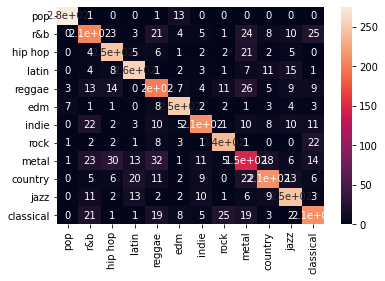

In [34]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, xticklabels=genres, yticklabels=genres)

### Conclusion<a id='Conclusion'></a>

Various classification models were trained on the audio features of the songs from each genre and compare their performance on unseen data. The Decision Tree Classifier was 66% percent accurate on average. The genres that the model learned best were Classical, Jazz, and Metal, whereas Pop was the most difficult genre to classify. I was sure that ensemble methods would outperform this model, but I thought that it was a good measure of just how much other algorithms improve performance overall. The Random Forest Classifier, with 498 estimators, as suggested by a randomized search of hyperparameters with cross validation, performed far better, averaging 75% accuracy. This model still picked up Classical, Jazz, and Metal the best, but its performance on the remaining genres significantly improved across the board, as well. On the other hand, the Gradient Boosting Classifier, with 455 estimators, a 0.1 learning rate, and a maximum tree depth of 4, as suggested by a randomized search of hyperparameters with cross validation, was only 74% accurate on average. Lastly, the Extreme Gradient Boosting (XGB) Classifier, with 401 estimators, a 0.25 lambda rate, a 0.1 gamma rate, a 0.1 learning rate, and a maximum tree depth of 7, as suggested by a randomized search of hyperparameters with cross validation, was 75% accurate on average, and was the best performer comparatively to the other models.